# Análise de Vendas de Supermercado

## 1. Importação de Dados

In [8]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    BASE_DIR = os.path.dirname(os.path.abspath(__file__))  # .py
except NameError:
    BASE_DIR = os.getcwd()  # Jupyter

DATA_PATH = os.path.abspath(
    os.path.join(BASE_DIR, "..", "..", "data", "external", "supermarket_sales.csv")
)

DATA_PATH

'/app/src/data/external/supermarket_sales.csv'

In [9]:
sales = pd.read_csv(DATA_PATH)

In [10]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Por inspeção, o tipo de dados 'Date' é um objeto, precisamos convertê-lo para datetime

## 2. Tratamento de Datas e Horários

In [6]:
sales['date'] = pd.to_datetime(sales['Date'])


In [7]:
sales['date'].dtype

dtype('<M8[ns]')

In [8]:
type(sales['date'])

pandas.core.series.Series

In [9]:
sales['date'] = pd.to_datetime(sales['date'])

In [10]:
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

In [11]:
sales['Time'] = pd.to_datetime(sales['Time'])

/tmp/ipython-input-721023929.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Time'] = pd.to_datetime(sales['Time'])


In [12]:
sales['Hour'] = (sales['Time']).dt.hour # tipo(sales['Time'])

Vamos ver as horas únicas de vendas neste conjunto de dados

In [13]:
sales['Hour'].nunique()  # nos dá o número de horas únicas

11

In [14]:
sales['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int32)

## 3. Estatísticas Descritivas e Categorias

In [15]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2026-01-14 15:24:41.880000,307.58738,4.761905e+00,15.379369,6.97270,2019-02-14 00:05:45.600000,15.256000,1.993000,2019.0,14.910000
min,10.080000,1.000000,0.508500,10.678500,2026-01-14 10:00:00,10.17000,4.761905e+00,0.508500,4.00000,2019-01-01 00:00:00,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,2026-01-14 12:43:00,118.49750,4.761905e+00,5.924875,5.50000,2019-01-24 00:00:00,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,2026-01-14 15:19:00,241.76000,4.761905e+00,12.088000,7.00000,2019-02-13 00:00:00,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,2026-01-14 18:15:00,448.90500,4.761905e+00,22.445250,8.50000,2019-03-08 00:00:00,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,2026-01-14 20:59:00,993.00000,4.761905e+00,49.650000,10.00000,2019-03-30 00:00:00,31.000000,3.000000,2019.0,20.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858,NaN,8.693563,0.835254,0.0,3.186857


 Vamos encontrar o número de valores únicos em colunas com tipo de dados objeto

In [16]:
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]

In [17]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

In [20]:
print("Valores únicos em Filial: {0}".format(len(sales['Branch'].unique().tolist())))
print("Valores únicos em Cidade: {0}".format(len(sales['City'].unique().tolist())))
print("Valores únicos em Tipo de Cliente: {0}".format(len(sales['Customer type'].unique().tolist())))
print("Valores únicos em Gênero: {0}".format(len(sales['Gender'].unique().tolist())))
print("Valores únicos em Linha de Produto: {0}".format(len(sales['Product line'].unique().tolist())))
print("Valores únicos em Forma de Pagamento: {0}".format(len(sales['Payment'].unique().tolist())))

Valores únicos em Filial: 3
Valores únicos em Cidade: 3
Valores únicos em Tipo de Cliente: 2
Valores únicos em Gênero: 2
Valores únicos em Linha de Produto: 6
Valores únicos em Forma de Pagamento: 3


## 4. Análise por Gênero e Filial

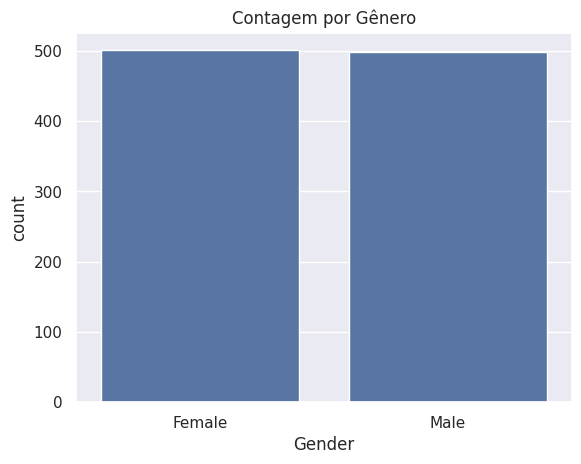

In [11]:
sns.set(style="darkgrid") # estilo do fundo do gráfico com grade
genderCount = sns.countplot(x="Gender", data=sales).set_title("Contagem por Gênero")

Text(0.5, 1.0, 'Avaliações por Filial')

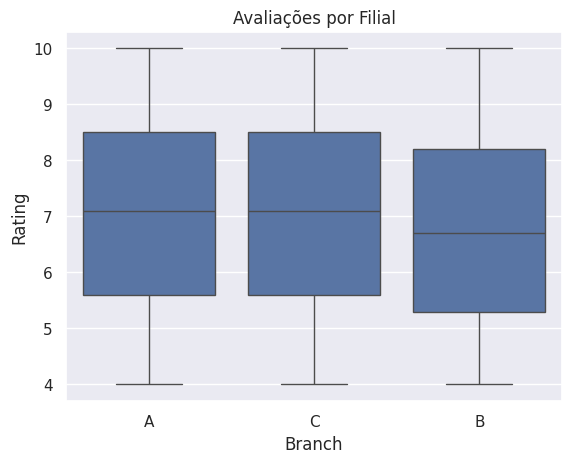

In [33]:
sns.boxplot(x="Branch", y="Rating", data=sales).set_title("Avaliações por Filial")

A filial B tem a menor avaliação entre todas as filiais

## 5. Análise de Vendas Temporais

*Vendas por hora na empresa* A maioria dos itens foi vendida por volta das 14:00 horas de tempo local

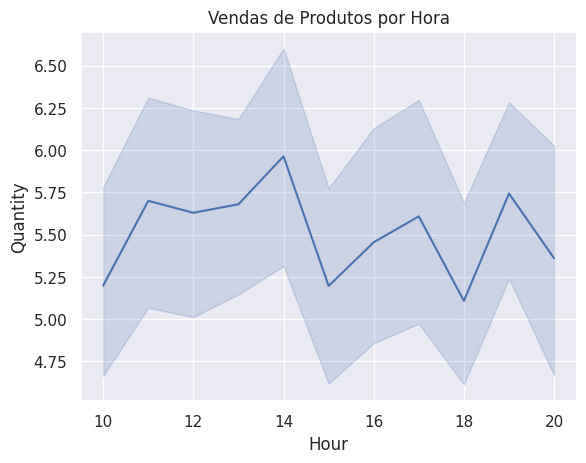

In [38]:
genderCount = sns.lineplot(x="Hour", y="Quantity", data=sales).set_title("Vendas de Produtos por Hora")

Abaixo podemos ver como a quantidade de vendas de cada filial se parece por hora de forma mensal

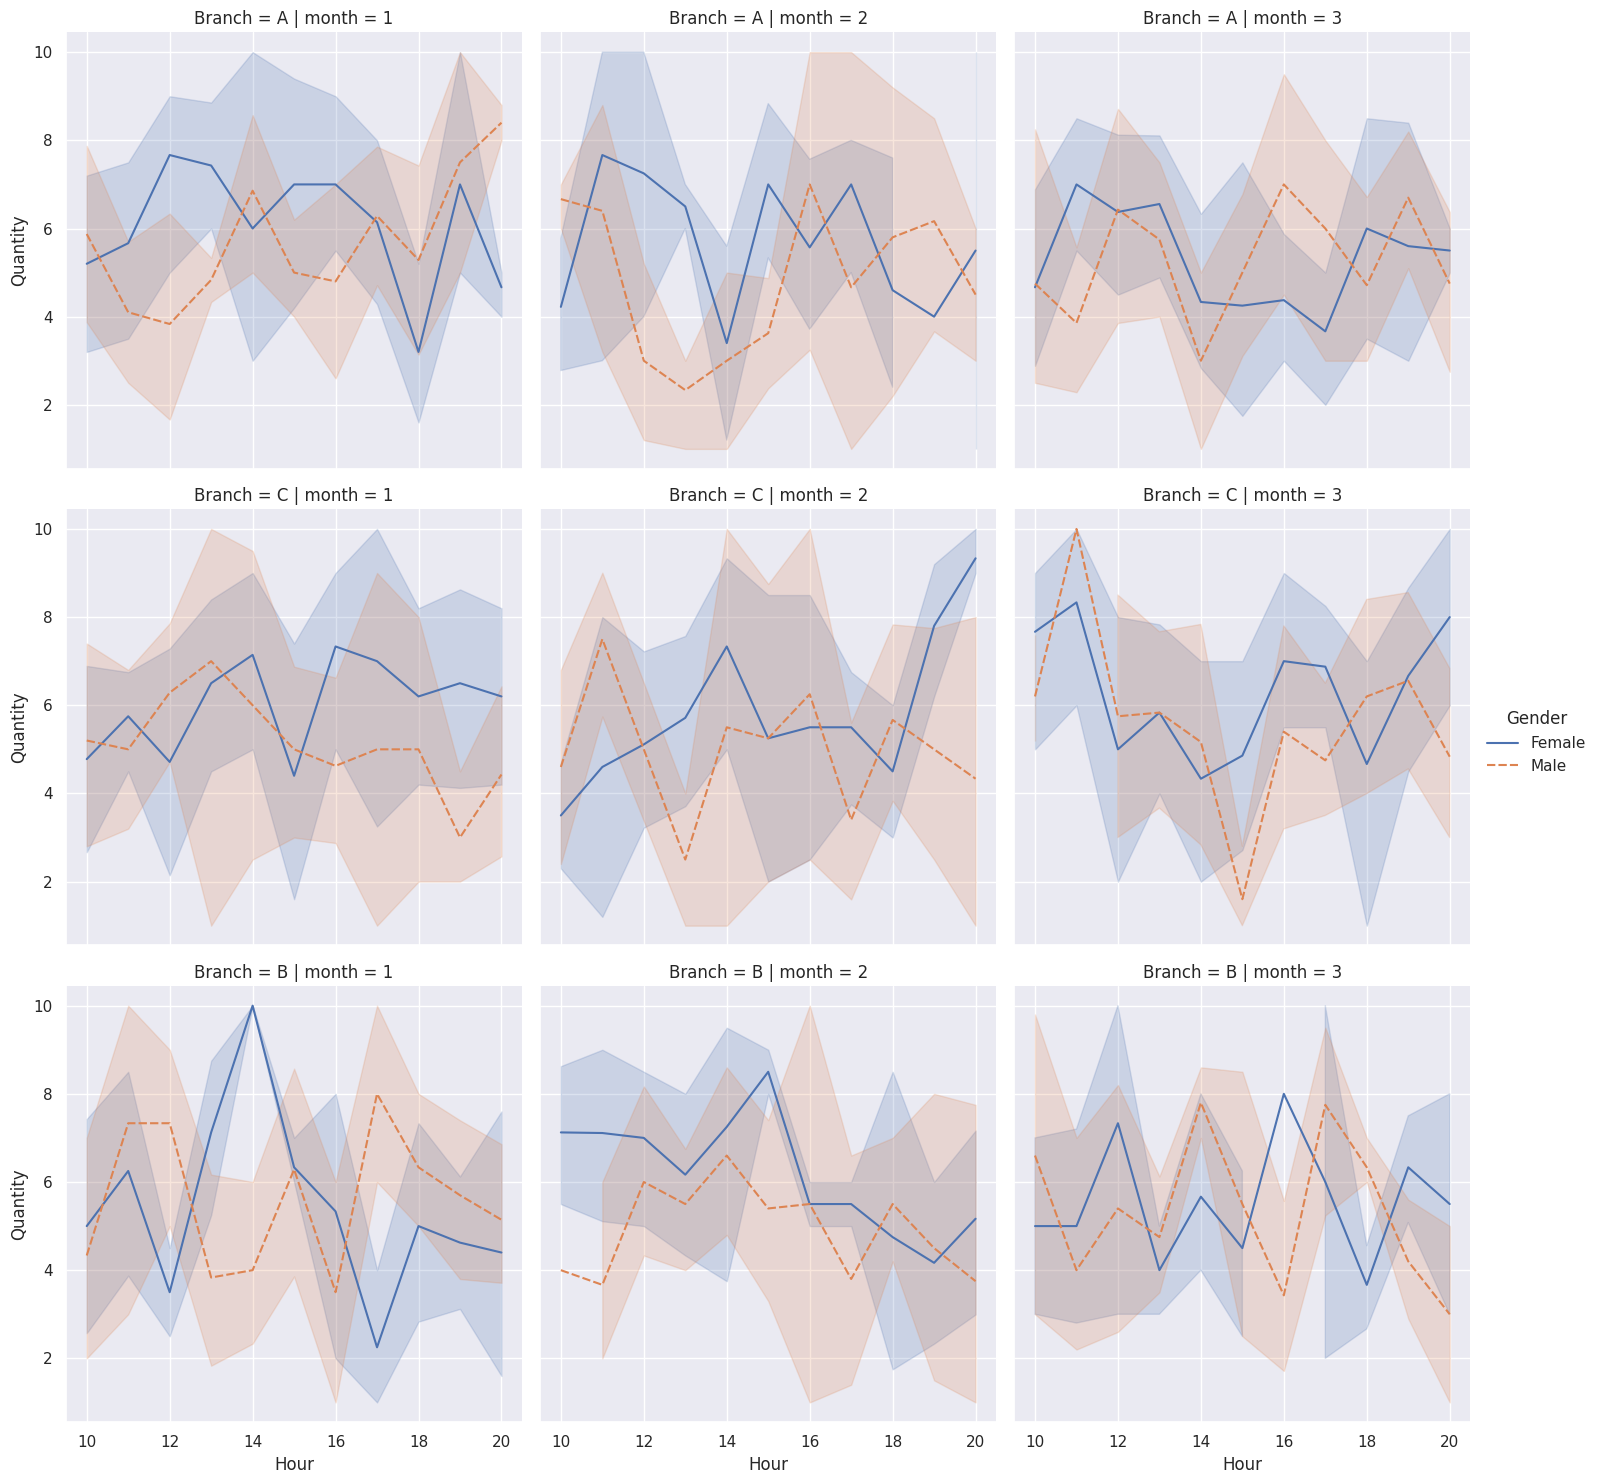

In [41]:
genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =sales)

 Abaixo podemos ver as vendas de cada filial por hora de forma mensal

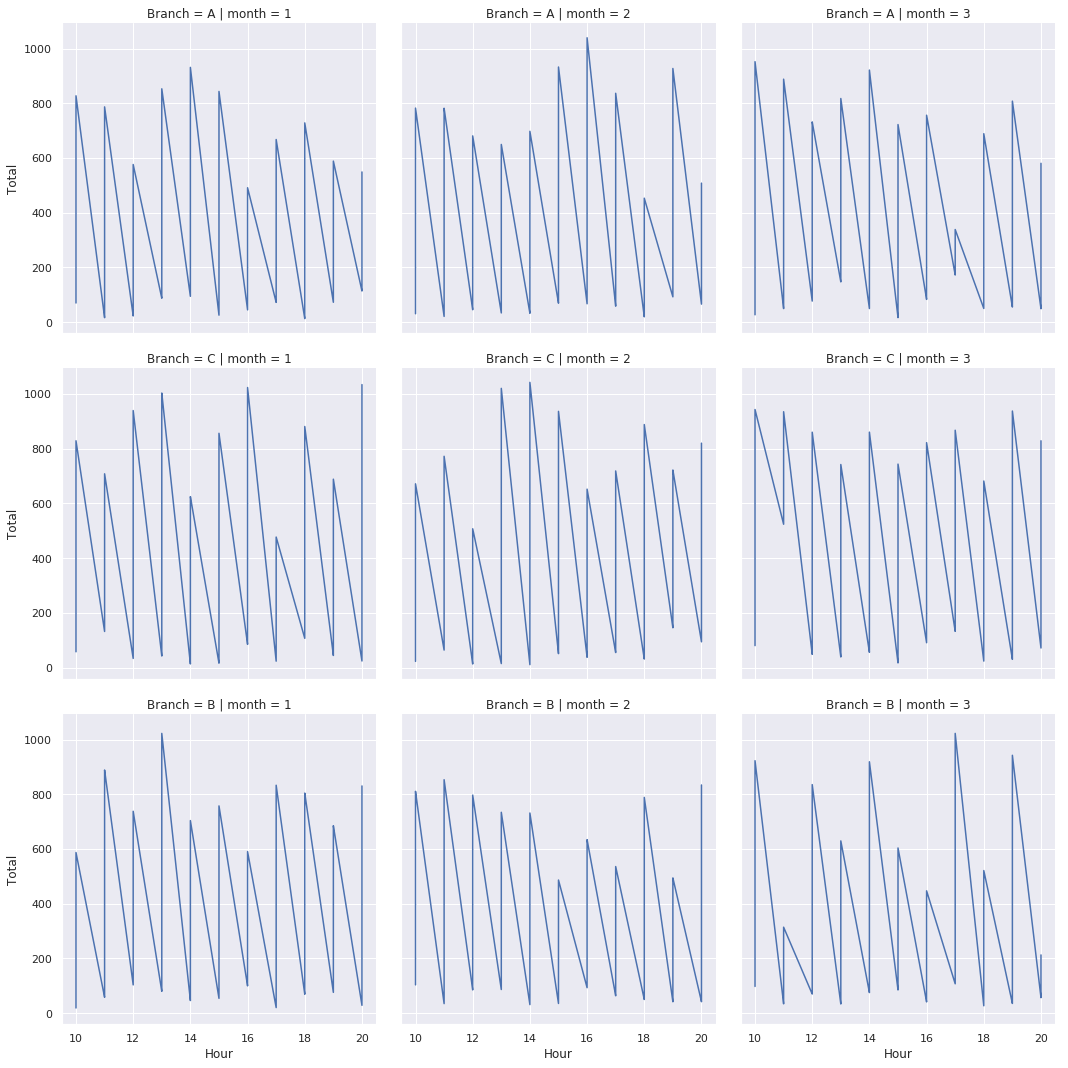

In [ ]:
genderCount  = sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =sales)

In [42]:
sales['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

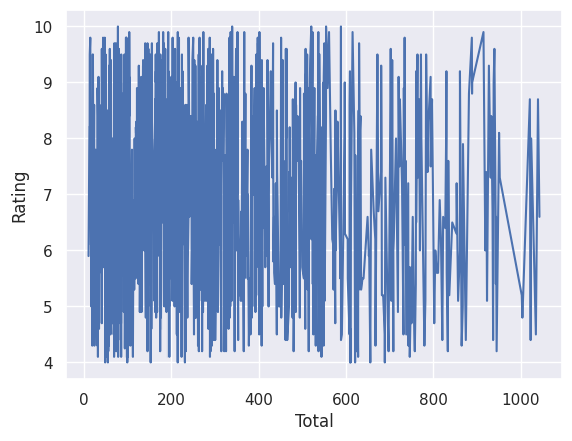

In [43]:
ageDisSpend = sns.lineplot(x="Total", y = "Rating", data =sales)

## 6. Análise de Produtos

Vamos examinar o desempenho de vários produtos.

<Axes: xlabel='Quantity', ylabel='Product line'>

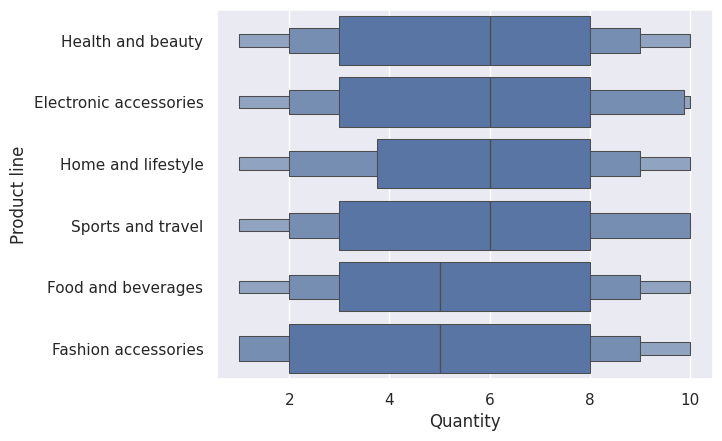

In [44]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=sales )

A partir do visual acima, Saúde e Beleza, Acessórios eletrônicos, Casa e estilo de vida, Esportes e viagens têm vendas de quantidade média melhor do que alimentos e bebidas, bem como acessórios de moda.

<Axes: xlabel='count', ylabel='Product line'>

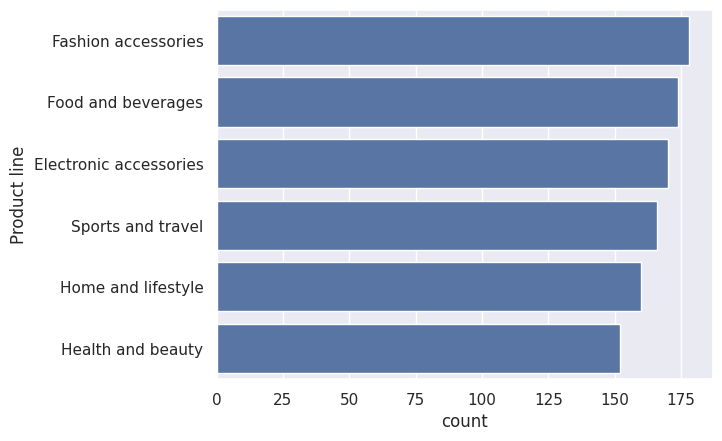

In [45]:
sns.countplot(y = 'Product line', data=sales, order = sales['Product line'].value_counts().index )

A imagem acima mostra o tipo de item de linha de produto mais vendido no conjunto de dados fornecido. Acessórios de Moda é o mais alto, enquanto Saúde e Beleza é o mais baixo

<Axes: xlabel='Total', ylabel='Product line'>

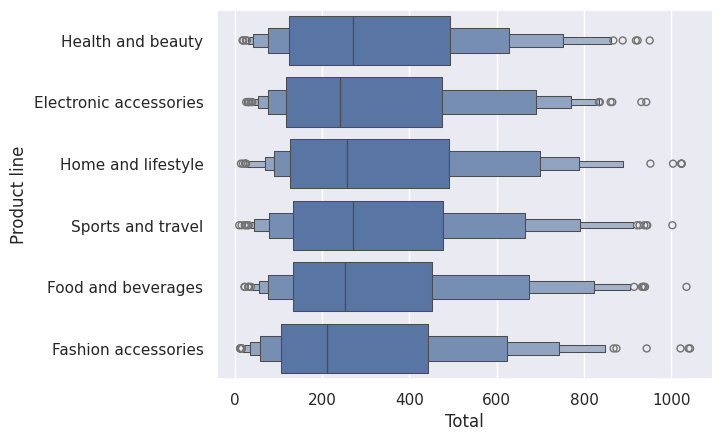

In [46]:
sns.boxenplot(y = 'Product line', x = 'Total', data=sales )

<Axes: xlabel='Total', ylabel='Product line'>

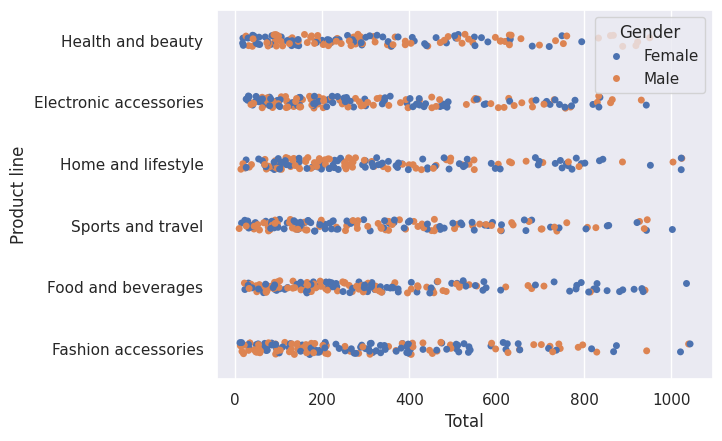

In [47]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=sales )

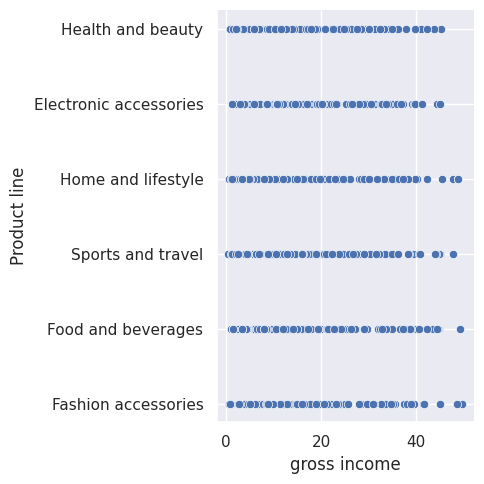

In [48]:
sns.relplot(y = 'Product line', x = 'gross income', data=sales )

<Axes: xlabel='Rating', ylabel='Product line'>

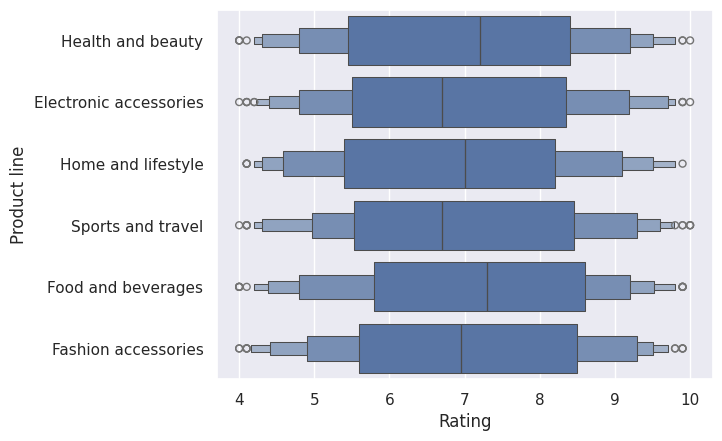

In [49]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=sales )

Alimentos e Bebidas têm a avaliação média mais alta, enquanto Esportes e Viagens têm a mais baixa

Vamos ver quando os clientes compram certos produtos nas várias filiais.

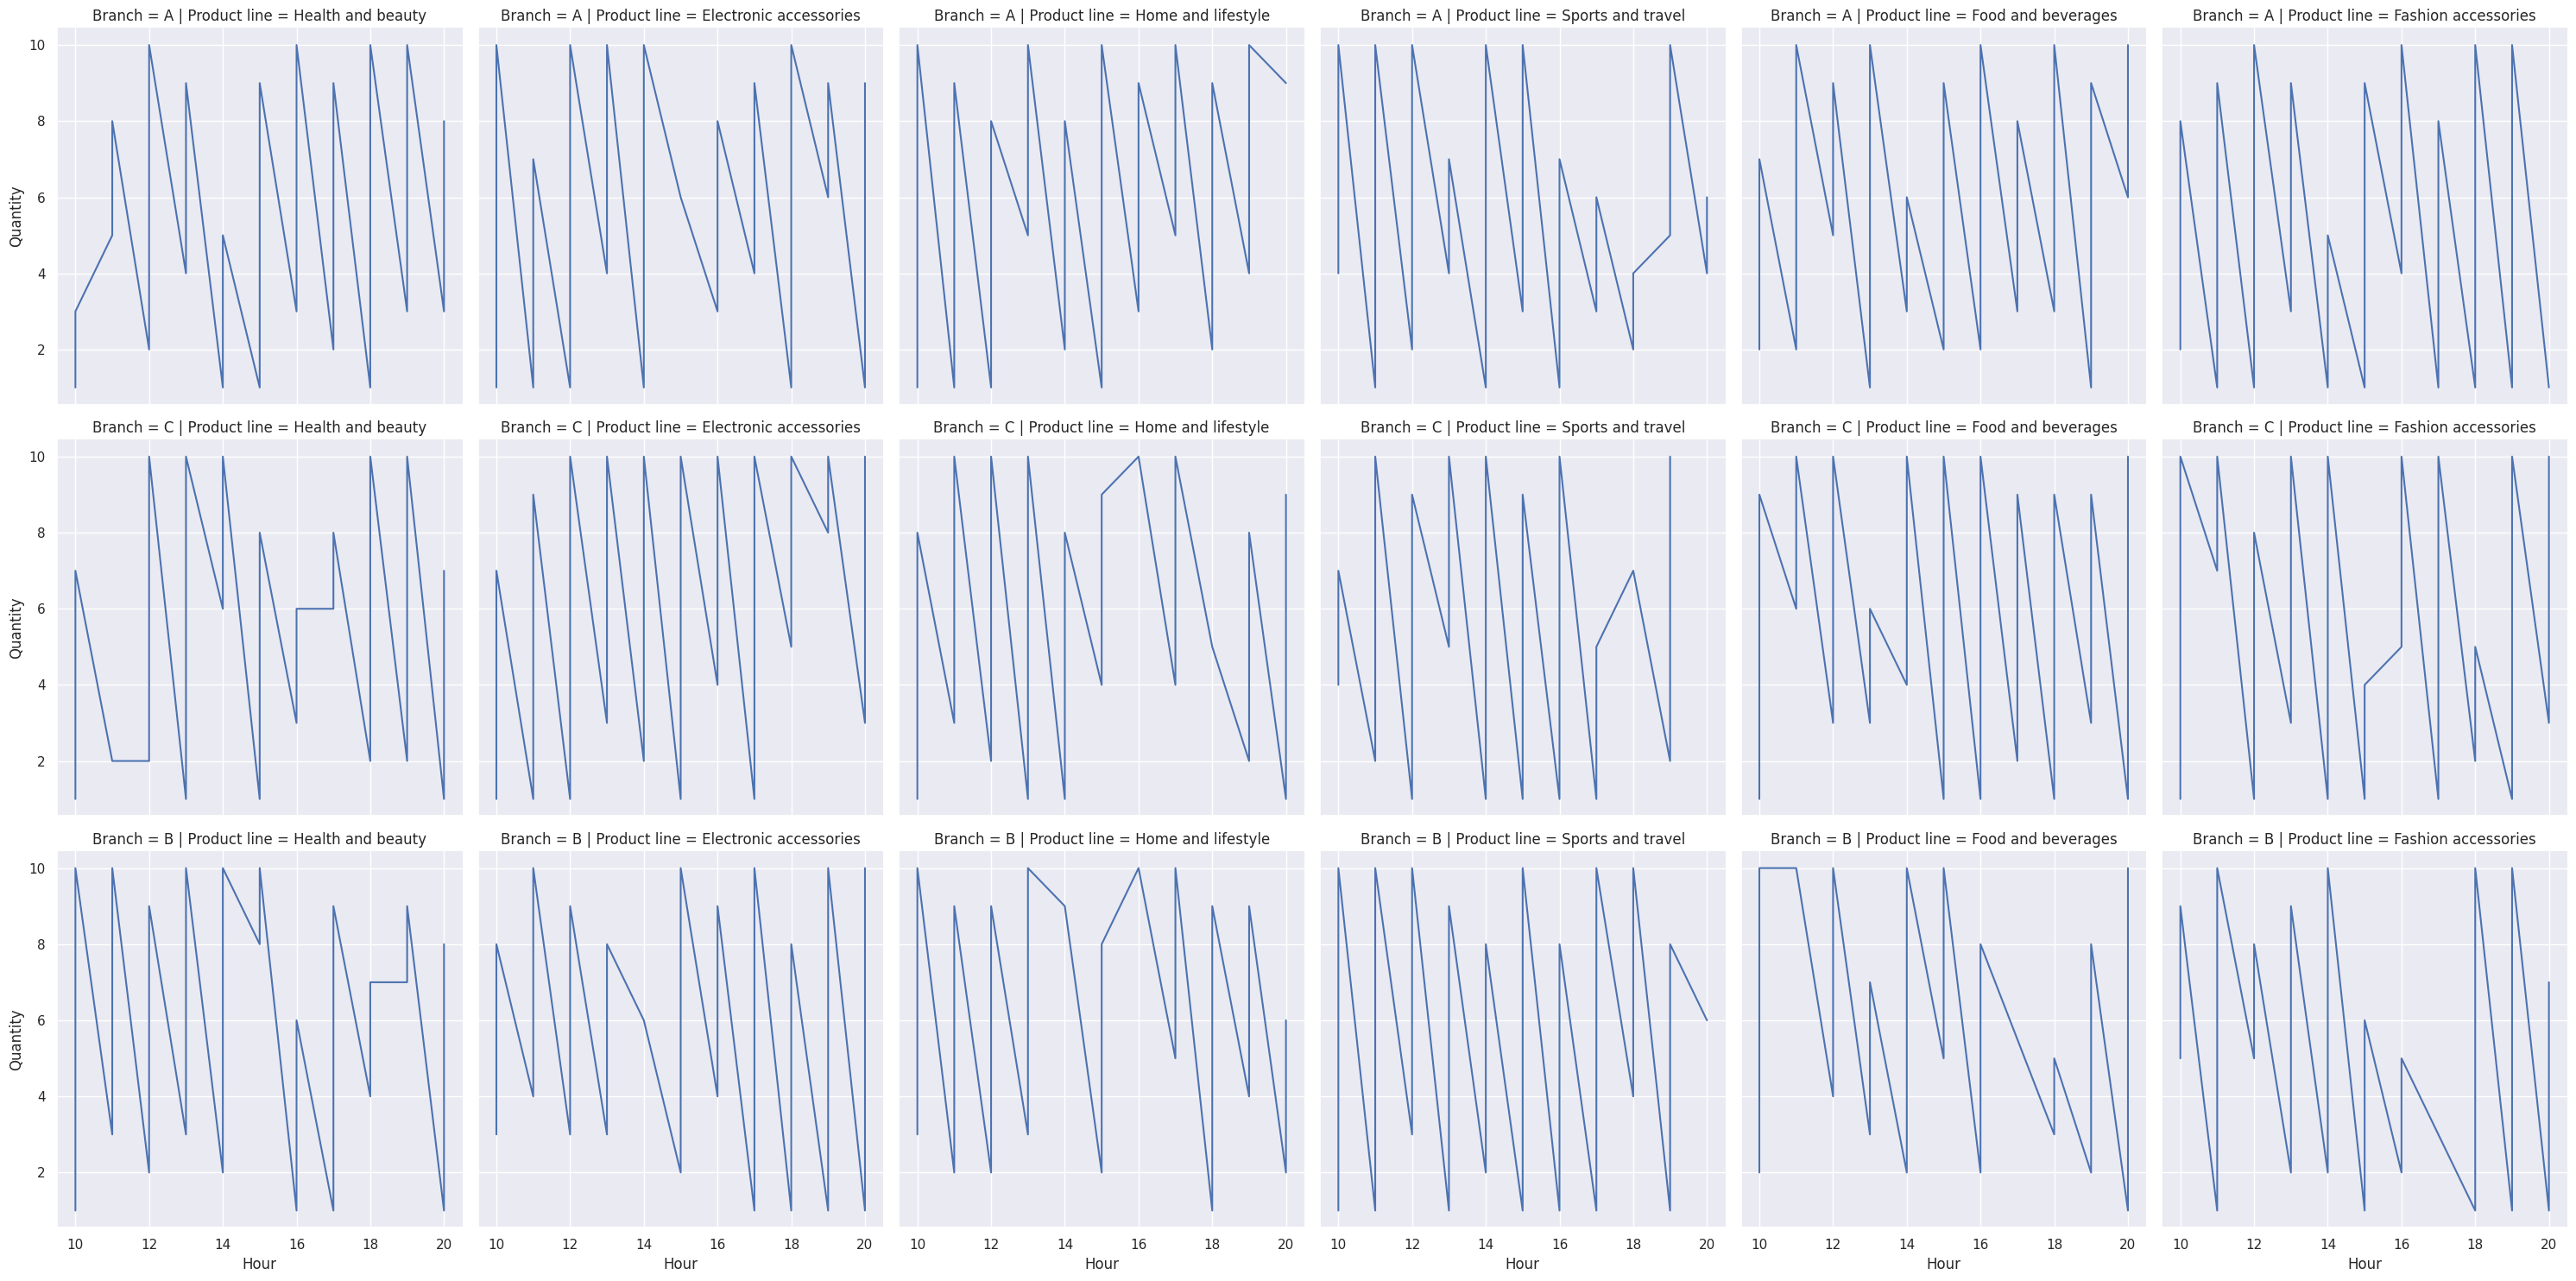

In [50]:
productCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', estimator = None, kind="line", data =sales)

Pelos gráficos acima, podemos ver que as vendas de alimentos e bebidas geralmente são altas em todas as três filiais à noite, especialmente por volta das 19:00

## 7. Canal de Pagamento

Vamos ver como os clientes fazem pagamento neste negócio

Text(0.5, 1.0, 'Canal de Pagamento')

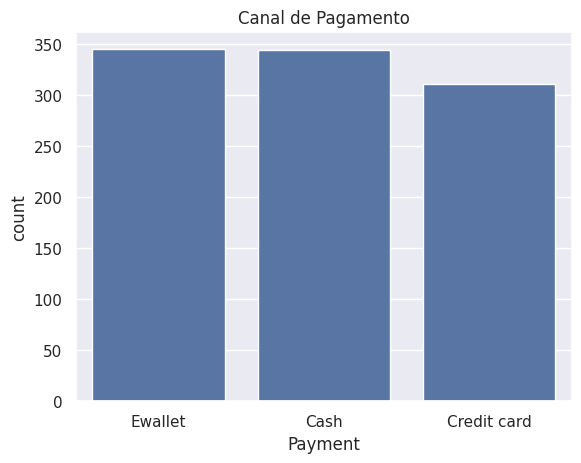

In [56]:
sns.countplot(x="Payment", data=sales).set_title("Canal de Pagamento")

A maioria dos clientes paga através de Carteira Eletrônica e Pagamento em Dinheiro, enquanto menos de 40 por cento deles pagam com cartão de crédito. Gostaríamos também de ver esta distribuição de tipo de pagamento em todas as filiais

Text(0.5, 1.0, 'Canal de Pagamento por Filial')

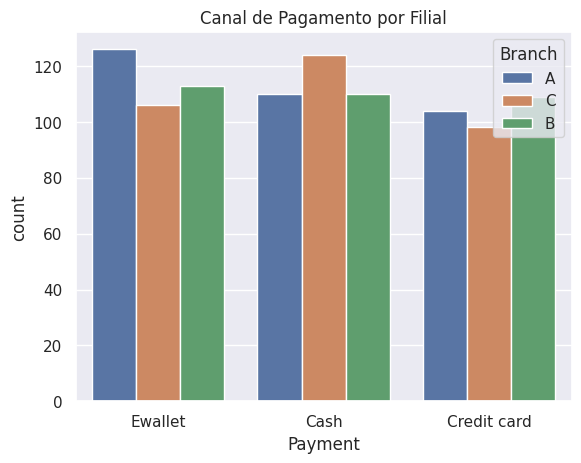

In [57]:
sns.countplot(x="Payment", hue="Branch", data=sales).set_title("Canal de Pagamento por Filial")

## 8. Análise de Clientes

Por inspeção, existem dois tipos de clientes. Membros e Normais. Vamos ver quantos existem e onde estão

In [53]:
sales['Customer type'].nunique()

2

Text(0.5, 1.0, 'Tipo de Cliente')

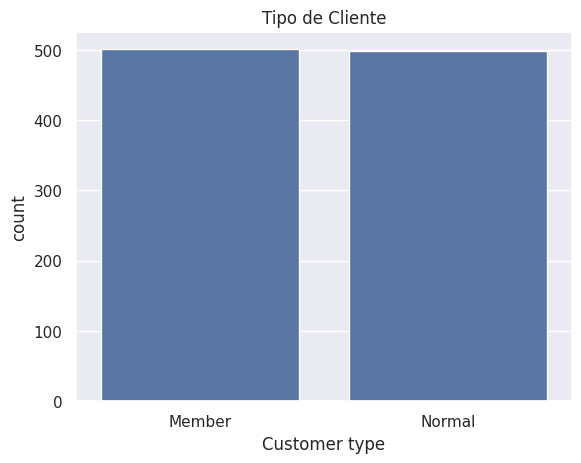

In [58]:
sns.countplot(x="Customer type", data=sales).set_title("Tipo de Cliente")

Text(0.5, 1.0, 'Tipo de Cliente por Filial')

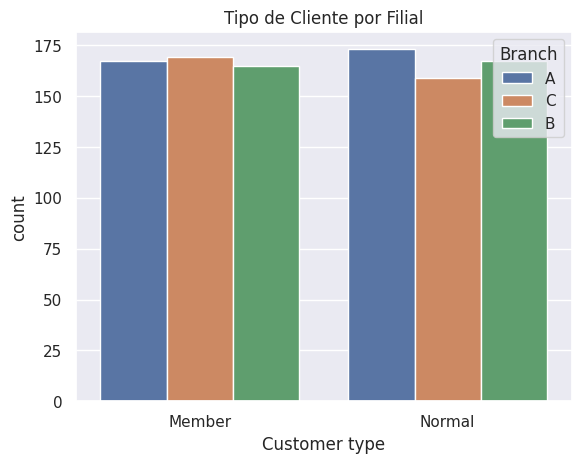

In [59]:
sns.countplot(x="Customer type", hue="Branch", data=sales).set_title("Tipo de Cliente por Filial")

## 9. O tipo de cliente influencia as vendas?

In [60]:
sales.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


<Axes: xlabel='Customer type', ylabel='Total'>

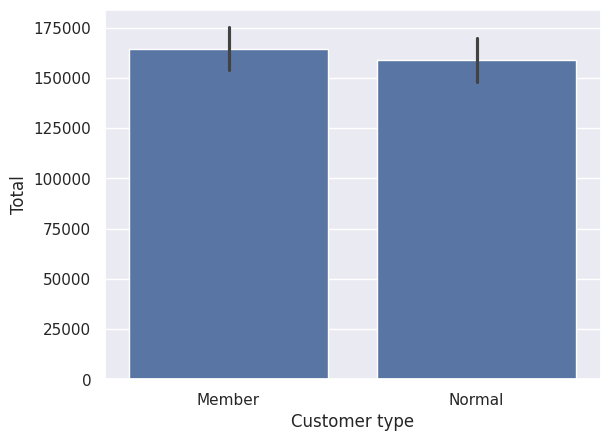

In [61]:
sns.barplot(x="Customer type", y="Total", estimator = sum, data=sales)

O tipo de cliente influencia a avaliação do cliente? Vamos descobrir

Text(0.5, 1.0, 'Tipo de Cliente')

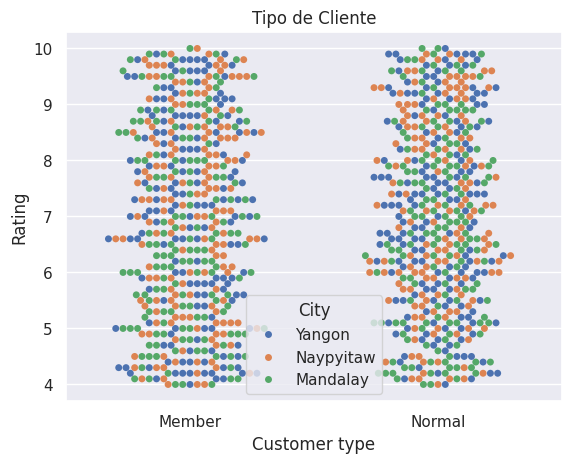

In [62]:
sns.swarmplot(x="Customer type", y="Rating", hue="City", data=sales).set_title("Tipo de Cliente")

Com o uso de buscas no Google, foi possível obter a latitude e a longitude de cada cidade.

## 10. Mapeamento e Correlações

In [64]:
long = {"Yangon": 16.8661, "Naypyitaw": 19.7633, "Mandalay": 21.9588 }
lat = {"Yangon": 96.1951, "Naypyitaw": 96.0785, "Mandalay": 96.0891 }
for set in sales:
    sales['long'] = sales['City'].map(long)
    sales['lat'] = sales['City'].map(lat)

Text(0.5, 1.0, 'Tipo de Cliente')

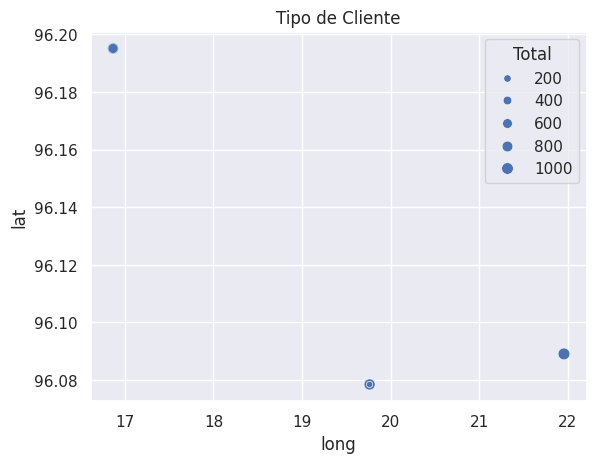

In [65]:
sns.scatterplot(x="long",  y = "lat",size = "Total", data =sales, legend = "brief").set_title("Tipo de Cliente")

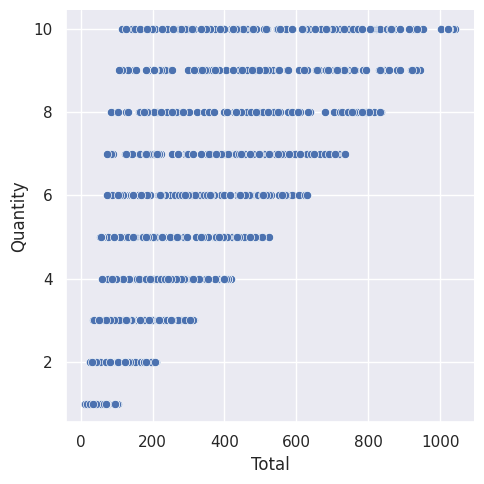

In [66]:
sns.relplot(x="Total",  y = "Quantity", data =sales)